In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:
data = pd.read_csv("drug200.csv")
data.head(16)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [3]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=200, step=1)

In [7]:
data.shape

(200, 6)

In [8]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
data.groupby(by="Age")[['Cholesterol','Drug']].value_counts()

Age  Cholesterol  Drug 
15   NORMAL       drugY    2
     HIGH         drugX    1
16   NORMAL       drugY    2
     HIGH         drugC    1
17   NORMAL       drugX    1
                          ..
73   HIGH         drugY    2
74   HIGH         drugB    1
                  drugY    1
     NORMAL       drugX    1
                  drugY    1
Length: 157, dtype: int64

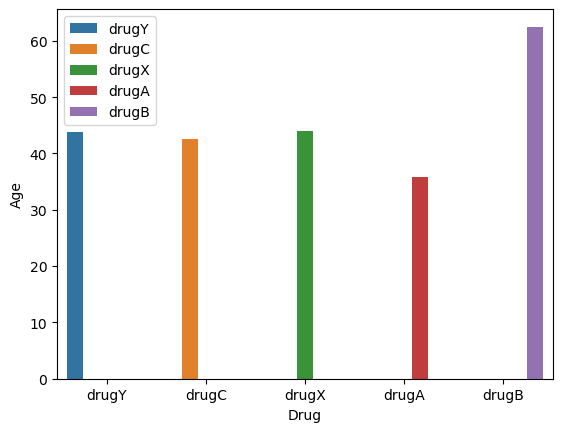

In [10]:
sns.barplot(x='Drug', y ='Age', hue='Drug', ci= None, data= data)
plt.legend(loc=0)

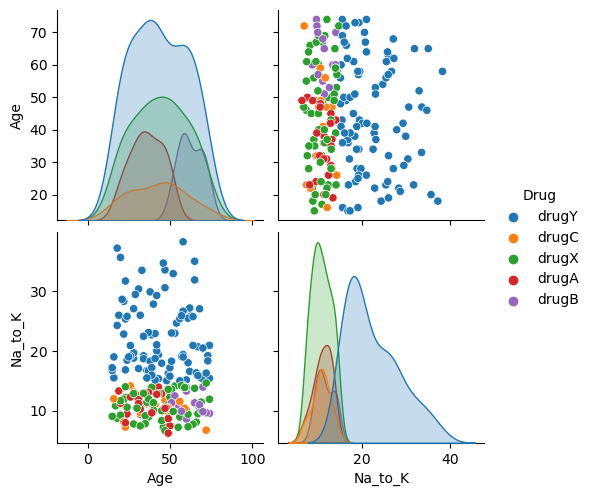

In [11]:
sns.pairplot(data, hue='Drug')

In [18]:
X = pd.get_dummies(data, columns = ['Sex', 'BP', 'Cholesterol'])

In [21]:
X.columns

Index(['Age', 'Na_to_K', 'Drug', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW',
       'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL'],
      dtype='object')

In [23]:
X = X[['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW','BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL']]

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   Na_to_K             200 non-null    float64
 2   Sex_F               200 non-null    uint8  
 3   Sex_M               200 non-null    uint8  
 4   BP_HIGH             200 non-null    uint8  
 5   BP_LOW              200 non-null    uint8  
 6   BP_NORMAL           200 non-null    uint8  
 7   Cholesterol_HIGH    200 non-null    uint8  
 8   Cholesterol_NORMAL  200 non-null    uint8  
dtypes: float64(1), int64(1), uint8(7)
memory usage: 4.6 KB


In [25]:
Y = data['Drug']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state = 42)

In [27]:
X_train

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
2,47,10.114,0,1,0,1,0,1,0
77,26,19.161,1,0,1,0,0,0,1
46,37,13.091,1,0,1,0,0,1,0
187,47,10.403,0,1,1,0,0,1,0
191,23,8.011,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
106,22,11.953,0,1,0,0,1,1,0
14,50,12.703,1,0,0,0,1,1,0
92,29,29.450,1,0,1,0,0,1,0
179,67,15.891,1,0,0,0,1,1,0


In [29]:
Y_train

2      drugC
77     drugY
46     drugA
187    drugA
191    drugA
       ...  
106    drugX
14     drugX
92     drugY
179    drugY
102    drugC
Name: Drug, Length: 120, dtype: object

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier(max_depth=2)

In [36]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'X[1] <= 14.829\ngini = 0.682\nsamples = 120\nvalue = [13, 10, 10, 29, 58]'),
 Text(0.4, 0.5, 'X[4] <= 0.5\ngini = 0.685\nsamples = 62\nvalue = [13, 10, 10, 29, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.381\nsamples = 39\nvalue = [0, 0, 10, 29, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.491\nsamples = 23\nvalue = [13, 10, 0, 0, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 58\nvalue = [0, 0, 0, 0, 58]')]

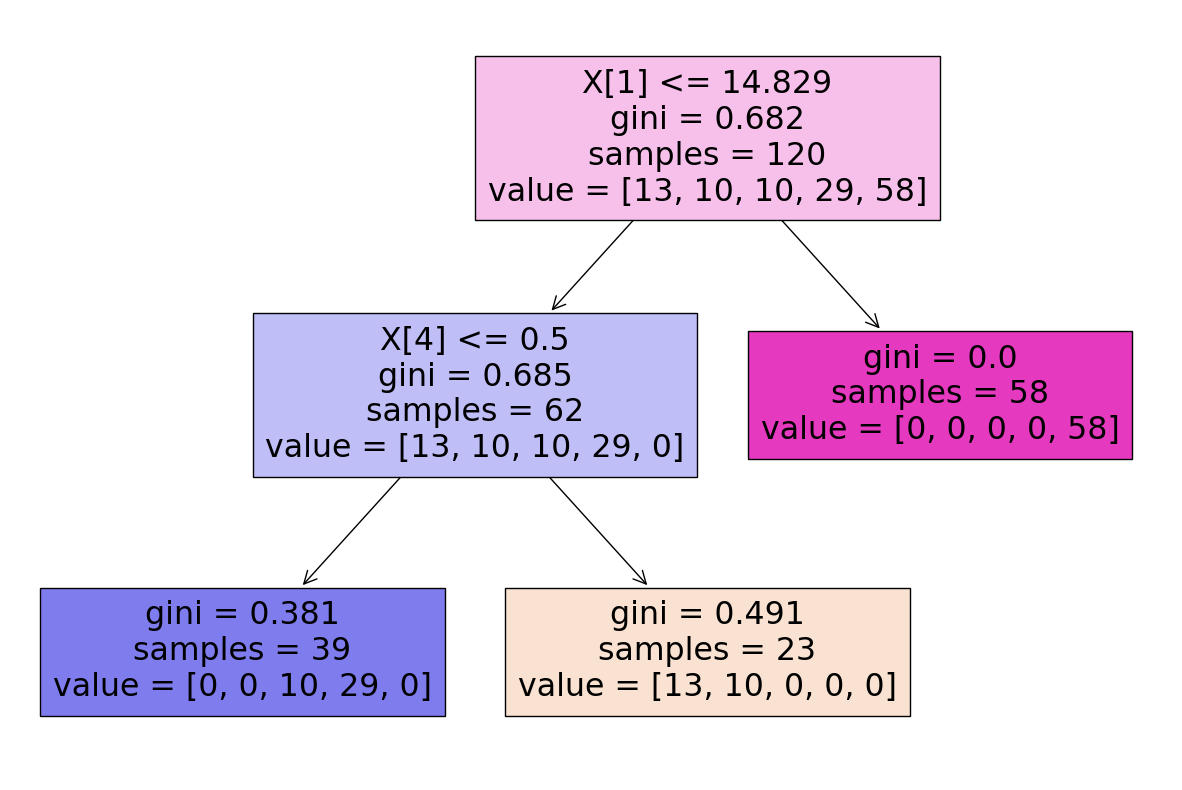

In [37]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled=True)

In [39]:
y_pred = dt.predict(X_test)
y_pred

array(['drugX', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugA', 'drugY', 'drugA', 'drugX', 'drugX', 'drugY', 'drugA',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugX', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugY', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugA', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugX', 'drugX', 'drugX', 'drugA', 'drugA', 'drugX', 'drugY',
       'drugX', 'drugA', 'drugX'], dtype=object)

In [41]:
X_test

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
95,36,11.424,0,1,0,1,0,0,1
15,16,15.516,1,0,1,0,0,0,1
30,18,8.750,1,0,0,0,1,0,1
158,59,10.444,1,0,0,1,0,1,0
128,47,33.542,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
113,65,13.769,1,0,0,1,0,0,1
26,31,30.366,0,1,1,0,0,1,0
139,69,10.065,1,0,0,0,1,1,0
100,31,11.871,0,1,1,0,0,0,1


In [42]:
Y_test

95     drugX
15     drugY
30     drugX
158    drugC
128    drugY
       ...  
113    drugX
26     drugY
139    drugX
100    drugA
111    drugX
Name: Drug, Length: 80, dtype: object

In [44]:
user = [[16,15.516,1,0,1,0,0,0,1]]

In [45]:
result = dt.predict(user)
result

C:\ProgramData\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

In [51]:
score = accuracy_score(y_pred,Y_test)
score

0.85

In [52]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

       drugA       1.00      0.62      0.77        16
       drugB       0.00      0.00      0.00         0
       drugC       0.00      0.00      0.00         0
       drugX       1.00      0.81      0.89        31
       drugY       1.00      1.00      1.00        33

    accuracy                           0.85        80
   macro avg       0.60      0.49      0.53        80
weighted avg       1.00      0.85      0.91        80



C:\ProgramData\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
